In [1]:
!activate tf2.4

In [15]:
pip install --user ipykernel tf2.4

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tf2.4 (from versions: none)
ERROR: No matching distribution found for tf2.4


!pip install tensorflow --upgrade
!pip install collections
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install PIL
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en
!pip install sklearn
!pip install keras
!pip install pyspellchecker
!pip install xgboost
!pip3 install textblob
!pip install pyLDAvis
!pip install gensim
!pip install IPython
import nltk
nltk.download('all')
!pip install seaborn
!pip install h5py==2.9

In [67]:

import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

In [1]:


import string
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer=nltk.stem.WordNetLemmatizer()
wordnet.lemmatizer=WordNetLemmatizer()

from nltk.tokenize import word_tokenize

#Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image



#spell checker

from spellchecker import SpellChecker

#Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.model_selection import KFold,cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

#xgboost
import xgboost as xgb

from tensorflow.python import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

#to change date to datetime
from datetime import datetime
import time
import re

import string
import scipy.sparse

#Textblob

from textblob import TextBlob

#Gensim

from gensim import corpora,models,similarities,matutils
from gensim.models.ldamulticore import LdaMulticore


import pyLDAvis
import pyLDAvis.gensim_models as gensim

pyLDAvis.enable_notebook()

from gensim.models import CoherenceModel

#to pickle dataframe
import pickle

#show all the columns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',300)


#enable logging for gensim-optional but important
#import logging
#logging.basicConfid(format='%(asctime)s: %(levelname)s : %(message)s',level=logging.ERROR)

from IPython.display import clear_output
clear_output

#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [22]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

#spacy for preprocessing
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
nlp=spacy.load('en_core_web_sm')

Traceback (most recent call last):
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\runpy.py", line 183, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\runpy.py", line 142, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\runpy.py", line 109, in _get_module_details
    __import__(pkg_name)
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\spacy\__init__.py", line 11, in <module>
    from thinc.api import prefer_gpu, require_gpu, require_cpu  # noqa: F401
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\thinc\api.py", line 2, in <module>
    from .initializers import normal_init, uniform_init, glorot_uniform_init, zero_init
  File "C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\thinc\initializers.py", line 4, in <module>
    from .backends import Ops
  File "C:\Users\Vimal\anaconda3\envs\tf2

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [79]:
df=pd.read_csv('Reviews.csv')
df.head(2)

,Unnamed: 0,Ratings,Full_review,Object
0,0,5,I was a bit skeptical about buying this laptop...,Laptop
1,1,5,"Highly recommended, the packing was fantastic,...",Laptop


# understanding the data

In [80]:
df.shape

(35267, 4)

There are 35,267 rows and 4 columns in the dataset

In [81]:
print(df.columns)

Index(['Unnamed: 0', 'Ratings', 'Full_review', 'Object'], dtype='object')


Columns present are Unamed,Ratings, Full/-review and Object

In [82]:
df.dtypes

Unnamed: 0      int64
Ratings         int64
Full_review    object
Object         object
dtype: object

2 columns have integer datas and 2 columns have string datas

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35267 entries, 0 to 35266
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   35267 non-null  int64 
 1   Ratings      35267 non-null  int64 
 2   Full_review  35267 non-null  object
 3   Object       35267 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


There are no null values present in the data

# Feature engineering

In [84]:
#removing unwanted column-unnamed
df.drop('Unnamed: 0', axis =1, inplace = True)

C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


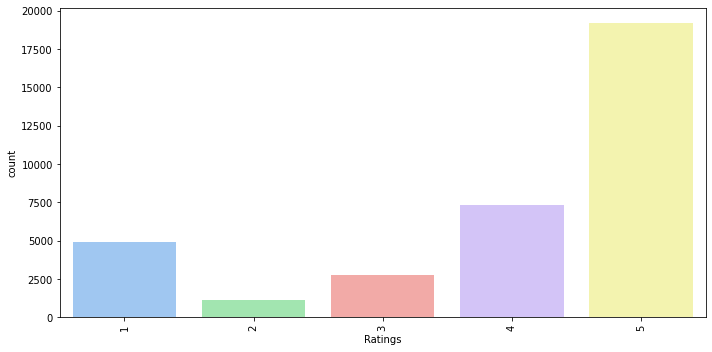

In [85]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

generate_countplot(df['Ratings'])

The data is unbalanced dataset

In [86]:
#analysing length of reviews
df['length']=df.Full_review.str.len()
df.head()

,Ratings,Full_review,Object,length
0,5,I was a bit skeptical about buying this laptop...,Laptop,500
1,5,"Highly recommended, the packing was fantastic,...",Laptop,216
2,4,I wanted to buy a laptoo fir mild use which wi...,Laptop,499
3,5,"apple is best among all, even it is 2017 model...",Laptop,307
4,5,A decent purchase at very low rate thanks to f...,Laptop,432


The length of the full review with respect to each rating

<AxesSubplot:xlabel='Ratings', ylabel='length'>

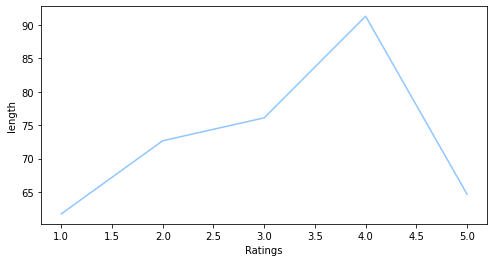

In [87]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.lineplot(x='Ratings', y='length', data=df, ci=None)

Length of reviews is highest for a rating of 4 and lowers for higher or lower than 4

**Data Preprocessing**

In [88]:
df['Full_review']=df['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
df['Full_review']=df['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
df['Full_review']=df['Full_review'].str.replace(r'£|\$', 'dollers')
df['Full_review']=df['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')
df['Full_review']=df['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')
df['Full_review']=df['Full_review'].str.replace(r'[^\w\d\s]', ' ')
df['Full_review']=df['Full_review'].str.replace(r'\s+', ' ')
df['Full_review']=df['Full_review'].str.replace(r'^\s+|\s+?$', '')

C:\Users\Vimal\AppData\Local\Temp/ipykernel_2268/2874526294.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Full_review']=df['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
C:\Users\Vimal\AppData\Local\Temp/ipykernel_2268/2874526294.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Full_review']=df['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
C:\Users\Vimal\AppData\Local\Temp/ipykernel_2268/2874526294.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Full_review']=df['Full_review'].str.replace(r'£|\$', 'dollers')
C:\Users\Vimal\AppData\Local\Temp/ipykernel_2268/2874526294.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Full_review']=df['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}

In [89]:
df

,Ratings,Full_review,Object,length
0,5,I was a bit skeptical about buying this laptop...,Laptop,500
1,5,Highly recommended the packing was fantastic m...,Laptop,216
2,4,I wanted to buy a laptoo fir mild use which wi...,Laptop,499
3,5,apple is best among all even it is numbr model...,Laptop,307
4,5,A decent purchase at very low rate thanks to f...,Laptop,432
...,...,...,...,...
35262,1,Everything is good but the configuration is ve...,Router,154
35263,4,Nice product,Router,12
35264,1,Superb quality,Router,14
35265,5,Aswme product Thanks,Router,20


In [90]:
#remove stopwords
stop=set(stopwords.words('english')+ ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Full_review']=df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatisation
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
     
#adding POS tags with lemmatization
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #tuple of (token,wordnet_tag)
    wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    
    lemmatized_sentence=[]
    for word,tag in wordnet_tagged:
        if tag is None:
            #if no available tag,append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)

df['Full_review']=df['Full_review'].apply(lambda x:lemmatize_sentence(x))

NameError: name 'wordnet' is not defined

In [ ]:
df['Full_review'][:2]

In [ ]:
a=df

In [ ]:
df.to_csv('updated_reviews')

# EDA

In [ ]:
#1.word count

#splitting the words as per spaces 
#length of the string of split based on spaces-will give list of all the terms
df["Review_WC"]=df['Full_review'].apply(lambda x:len(str(x).split(" ")))
print(df[["Review_WC",'Full_review']].head(3))



#Density plot and histogram of all word count
sns.distplot(df['Review_WC'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

In [ ]:
df.head(5)

   Review_CC                                        Full_review
0        328  I bit skeptical buying laptop first laptop fir...
1        142  Highly recommended packing fantastic macbook f...
2        295  I wanted buy laptoo fir mild use serve smoothl...


C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Review_CC', ylabel='Density'>

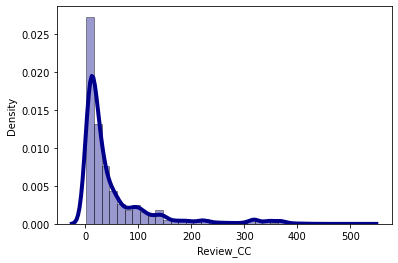

In [91]:
#2.Charachter count-COUNT OF EACH LETTER IN A SENTENCE

df['Review_CC']=df['Full_review'].str.len()
print(df[['Review_CC','Full_review']].head(3))

#Density plot and histogram of all charachter count
sns.distplot(df['Review_CC'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

   Review_AWL                                        Full_review
0    5.207547  I bit skeptical buying laptop first laptop fir...
1    6.526316  Highly recommended packing fantastic macbook f...
2    5.166667  I wanted buy laptoo fir mild use serve smoothl...


C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Review_AWL', ylabel='Density'>

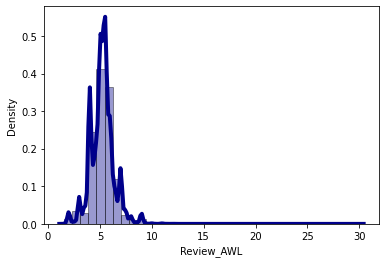

In [92]:
#3.Average word length

def avg_word(sentence):
    words=sentence.split()
    return(sum(len(word) for word in words)/len(words))

df['Review_AWL']=df['Full_review'].apply(lambda x: avg_word(x))
print(df[['Review_AWL','Full_review']].head(3))


#Density plot and histogram of average word length
sns.distplot(df['Review_AWL'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

In [93]:
df.head(5)

,Ratings,Full_review,Object,length,Review_CC,Review_AWL
0,5,I bit skeptical buying laptop first laptop fir...,Laptop,500,328,5.207547
1,5,Highly recommended packing fantastic macbook f...,Laptop,216,142,6.526316
2,4,I wanted buy laptoo fir mild use serve smoothl...,Laptop,499,295,5.166667
3,5,apple best among even numbr model design day d...,Laptop,307,182,5.535714
4,5,A decent purchase low rate thanks flipkart sal...,Laptop,432,296,4.940000


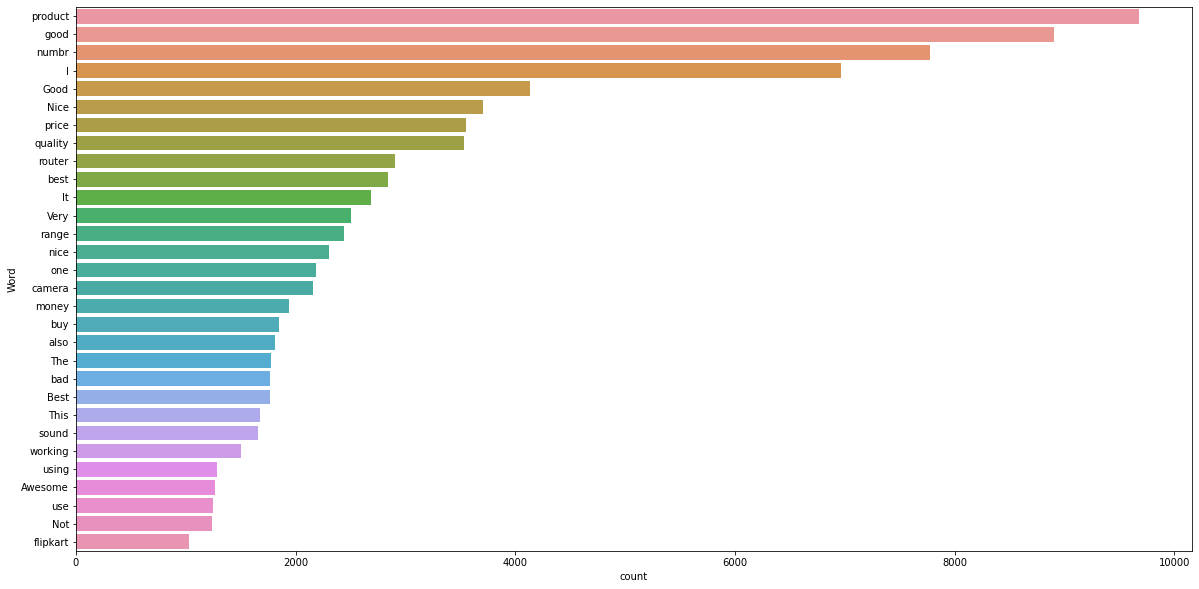

None


In [94]:
#4.Frequency distribution of top 30words


#creating 
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 20 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Full_review']))

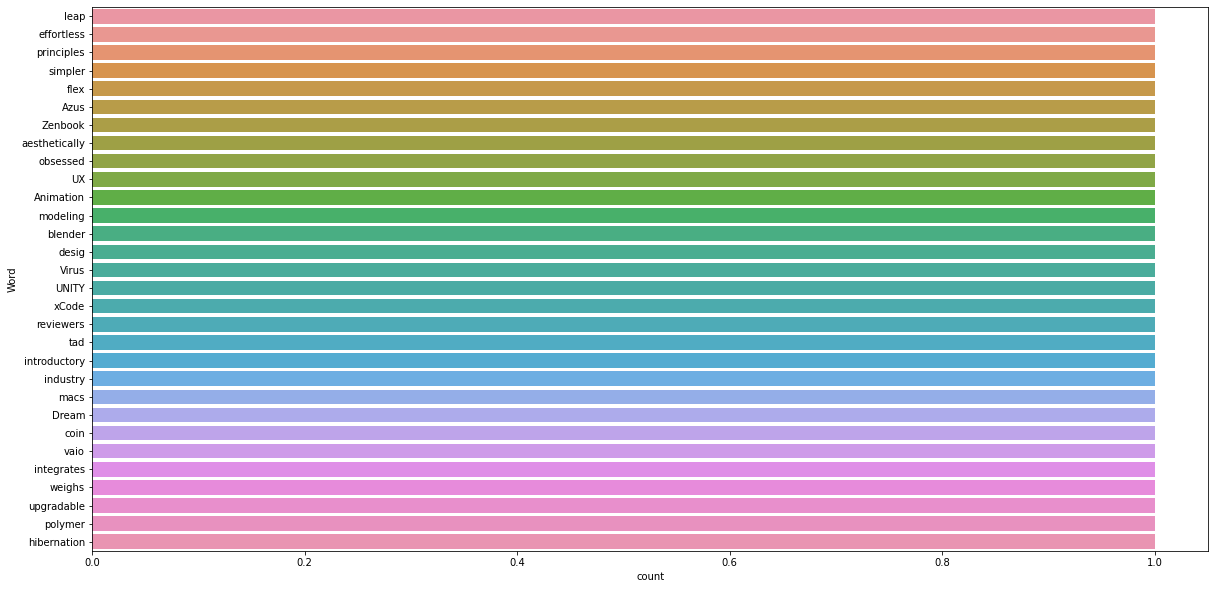

None


In [95]:
#top 30 rarest words

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)  
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 20 frequent words
    d=words_df.nsmallest(columns='count',n=terms)   #same as frequest other than the nsmallest
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Full_review']))

# Feature extraction

In [96]:
#TF-Term frequency
df_tf=(df['Full_review'][0:1].apply(lambda x: pd.value_counts(x.split(" ")))).sum(axis=0).reset_index()
df_tf.columns=['words','tf']


#IDF-inverse document frequency
for i,word in enumerate(df_tf['words']):
    df_tf.loc[i,'idf']=np.log(df_tf.shape[0]/len(df[df['Full_review'].str.contains(word)]))
    
#tf-idf
df_tf['tfidf']=df_tf['tf']*df_tf['idf']
df_tf[:2]

,words,tf,idf,tfidf
0,I,4,-5.036247,-20.144986
1,laptop,3,-2.817749,-8.453247


Converted textual data into numerical form

8


<AxesSubplot:>

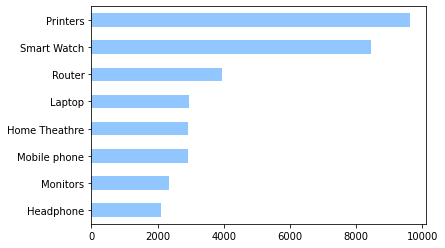

In [97]:
#Objects whose reviews are taken
print(df["Object"].nunique())
df['Object'].value_counts().sort_values().plot(kind='barh')

The highest reviews are of smart watch and printers

<AxesSubplot:xlabel='count', ylabel='Object'>

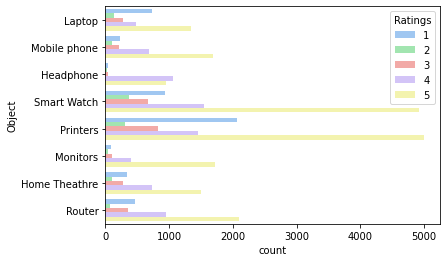

In [98]:
sns.countplot(y=df['Object'],hue=df['Ratings'])

the graph shows the ratings of various Objects in Flipkart

# Wordcloud

In [99]:
from wordcloud import WordCloud, STOPWORDS 
stopwords= set(STOPWORDS) 

def show_wordcloud(data, title =None): 
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40,
                          scale=3, random_state=1).generate(str(data))
                                                                                                                                        
    fig= plt.figure(1,figsize=(15,15)) 
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

Word cloud for *Review*:


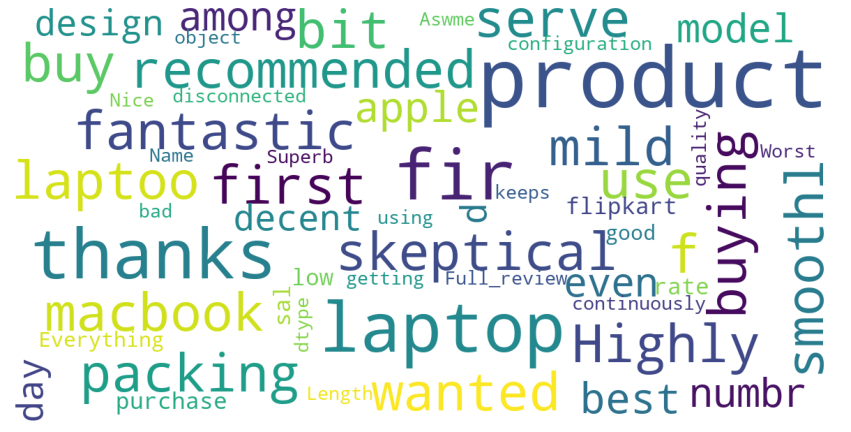

None






In [100]:
#creating wordcloud 
print("Word cloud for *Review*:")
print(show_wordcloud(df['Full_review']))
print("\n\n\n")

The most used words in the review is seen to be laptop,product,good,number,window and product. This can be seen with the size of the word cloud

RATING 1


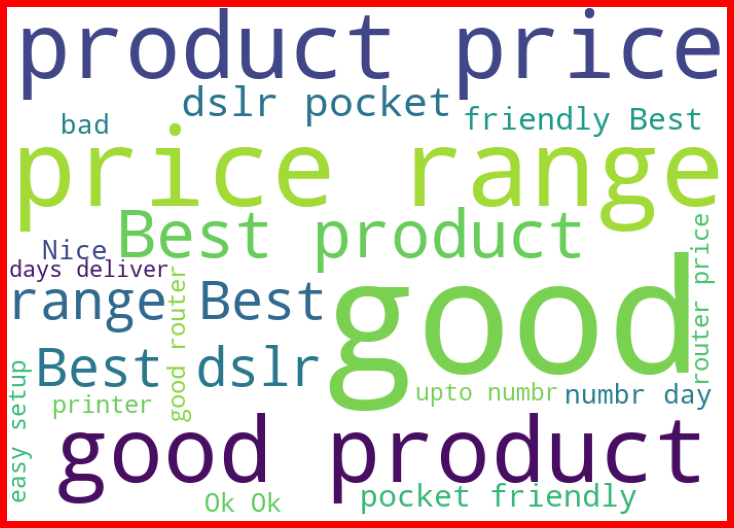

In [101]:
    print("RATING",1)
    Rating=df['Full_review'][df['Ratings']==1]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

RATING 2


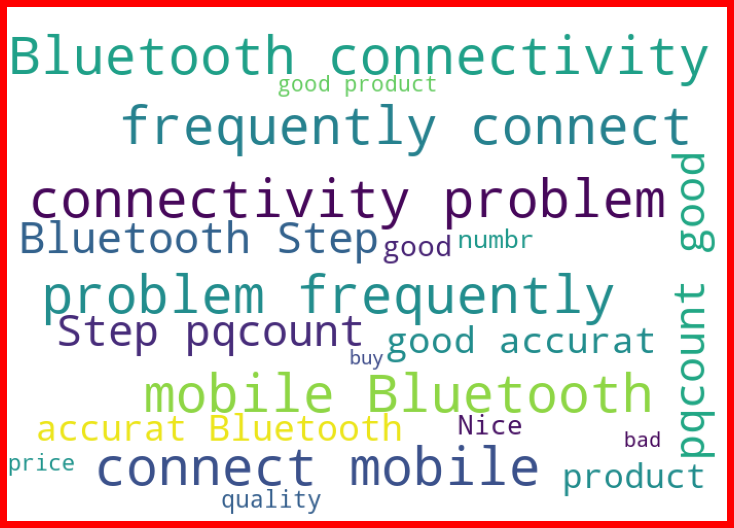

In [102]:
    print("RATING",2)
    Rating=df['Full_review'][df['Ratings']==2]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

RATING 3


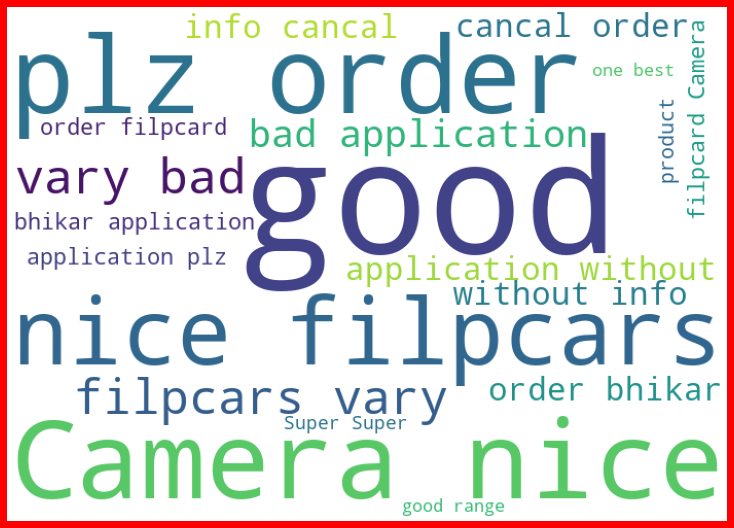

In [103]:
    print("RATING",3)
    Rating=df['Full_review'][df['Ratings']==3]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

RATING 4


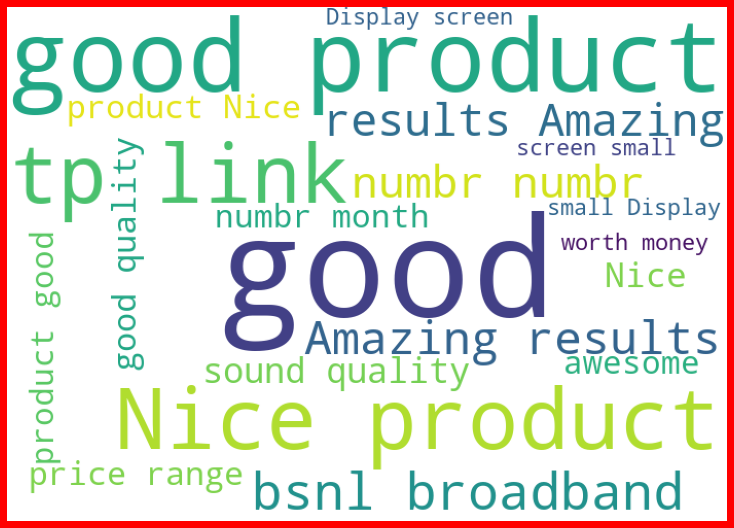

In [104]:
    print("RATING",4)
    Rating=df['Full_review'][df['Ratings']==4]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

RATING 5


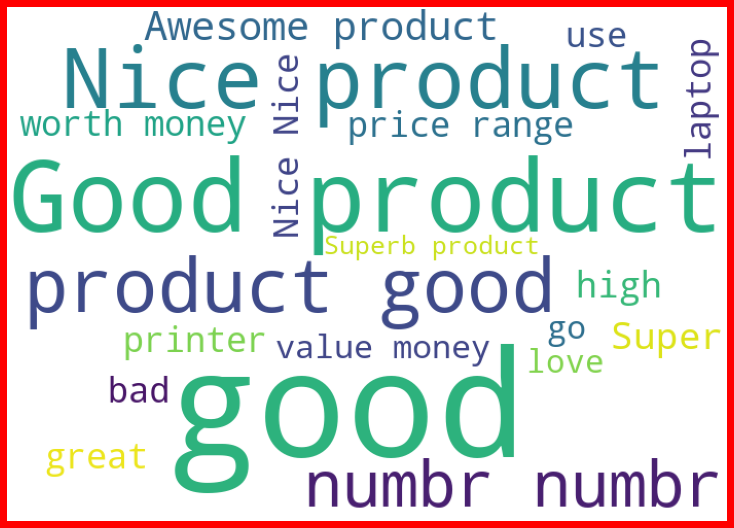

In [105]:
    print("RATING",5)
    Rating=df['Full_review'][df['Ratings']==5]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Word cloud for *Objects*:


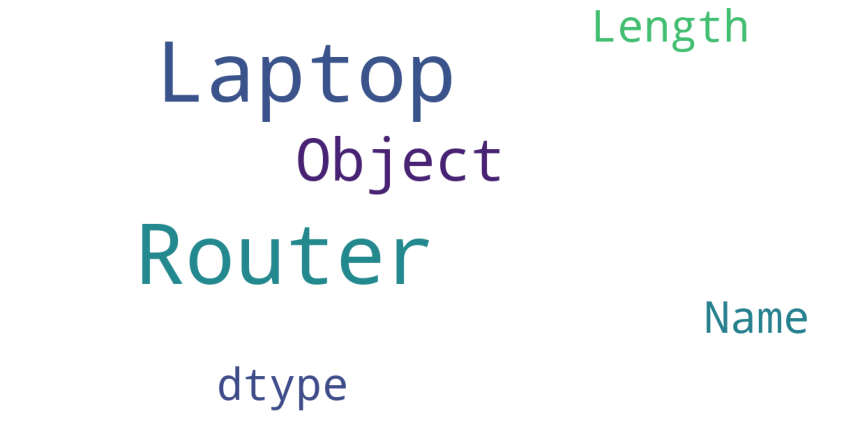

None






In [106]:
print("Word cloud for *Objects*:")
print(show_wordcloud(df['Object']))
print("\n\n\n")

The most number of objects is laptop

C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


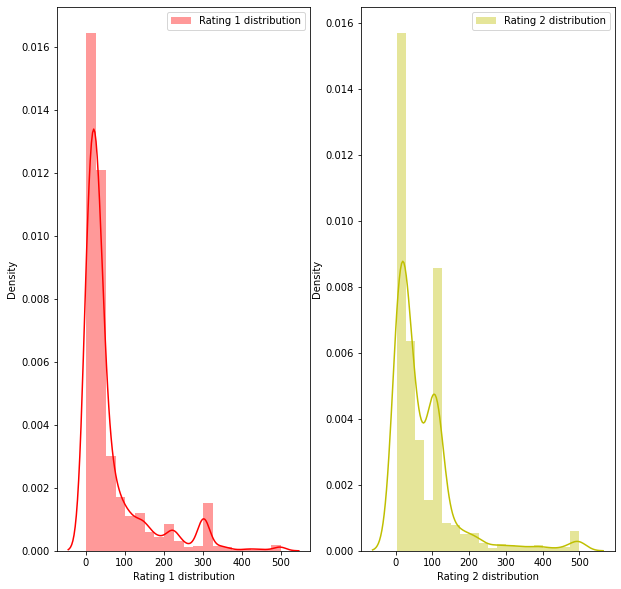

In [107]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


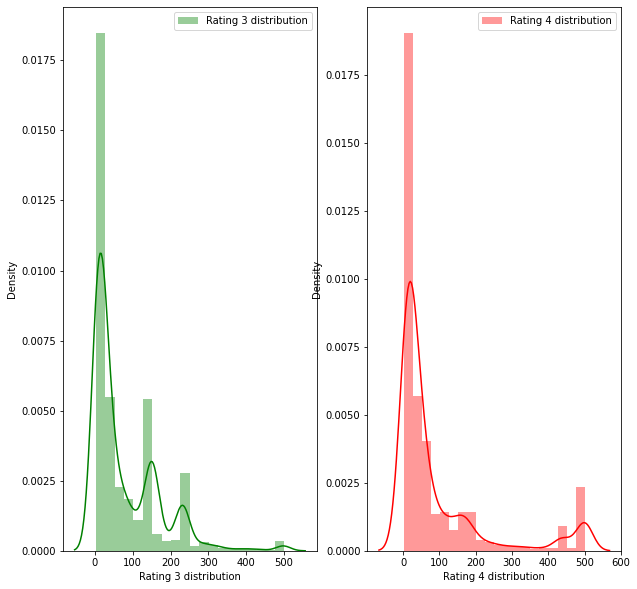

In [108]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


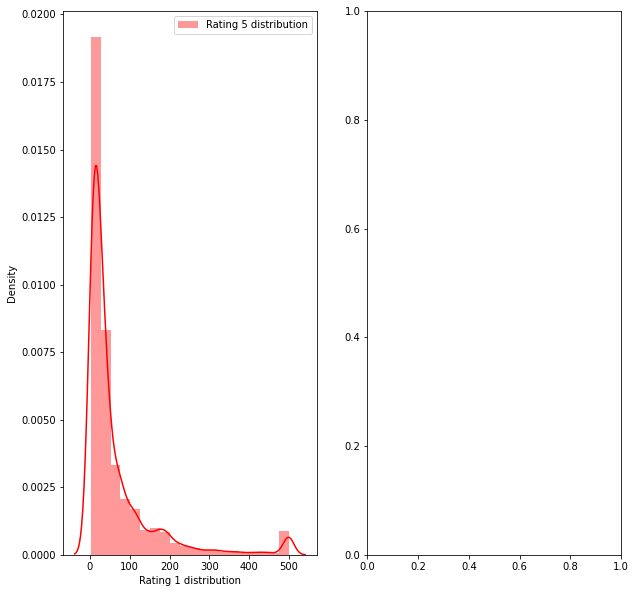

In [109]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==5]['length'],bins=20,ax=ax[0],label='Rating 5 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

plt.show()

# HEAT MAP

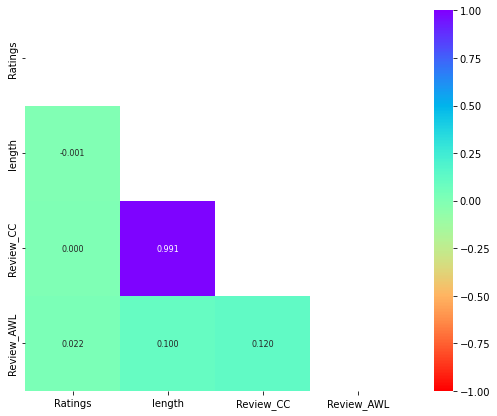

In [110]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [111]:
df

,Ratings,Full_review,Object,length,Review_CC,Review_AWL
0,5,I bit skeptical buying laptop first laptop fir...,Laptop,500,328,5.207547
1,5,Highly recommended packing fantastic macbook f...,Laptop,216,142,6.526316
2,4,I wanted buy laptoo fir mild use serve smoothl...,Laptop,499,295,5.166667
3,5,apple best among even numbr model design day d...,Laptop,307,182,5.535714
4,5,A decent purchase low rate thanks flipkart sal...,Laptop,432,296,4.940000
...,...,...,...,...,...,...
35262,1,Everything good configuration bad continuously...,Router,154,111,6.000000
35263,4,Nice product,Router,12,12,5.500000
35264,1,Superb quality,Router,14,14,6.500000
35265,5,Aswme product Thanks,Router,20,20,6.000000


In [112]:
df=a

In [ ]:
df.head(2)

In [ ]:
x=df['Full_review']
y=df['Ratings']

# MODELLING

In [132]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x)
train_word_features=word_vectorizer.transform(x)

In [133]:
#vectorizing into charachter level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=50000)

char_vectorizer.fit(x)
train_char_features=char_vectorizer.transform(x)

C:\Users\Vimal\anaconda3\envs\tf2.4\lib\site-packages\sklearn\feature_extraction\text.py:538: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [134]:
#clubbing the word and the charachter vector
from scipy.sparse import hstack
train_features=hstack([train_char_features,train_word_features])

Headstack is a library which will horizontally club the word and charachter matrix

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size=0.25, random_state=9)

print(y_train.shape)
print(y_test.shape)

print(x_train.shape)
print(x_test.shape)

(750,)
(250,)
(750, 48190)
(250, 48190)


In [136]:
!pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [137]:
#handling imbalanced data through smote technique

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
x_train_SMOTE, y_train_SMOTE= oversample.fit_resample(x_train, y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_SMOTE)))

The number of classes before fitCounter({5: 418, 4: 155, 1: 101, 3: 61, 2: 15})
The number of classes after fit Counter({1: 418, 5: 418, 4: 418, 3: 418, 2: 418})


In [125]:
y_train_SMOTE

0       1
1       5
2       1
3       5
4       4
       ..
2085    4
2086    4
2087    4
2088    4
2089    4
Name: Ratings, Length: 2090, dtype: int64

In [126]:
x_train_SMOTE

<2090x48190 sparse matrix of type '<class 'numpy.float64'>'
	with 873511 stored elements in Compressed Sparse Row format>

In [66]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

Default GPU Device: /device:GPU:0
****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.40285811500510377


Cross_Val_Score =  0.6772496416626852


classification_report
               precision    recall  f1-score   support

           1       0.36      0.45      0.40      1217
           2       0.09      0.38      0.14       272
           3       0.15      0.51      0.23       669
           4       0.46      0.43      0.45      1809
           5       0.83      0.37      0.51      4850

    accuracy                           0.40      8817
   macro avg       0.38      0.43      0.35      8817
weighted avg       0.61      0.40      0.45      8817



[[ 551  163  281  127   95]
 [  43  104   64   31   30]
 [  93   80  341   89   66]
 [ 209  246  394  783  177]
 [ 616  611 1183  667 1773]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**********************

C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


Accu

C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross_Val_Score =  0.7019051581151264


classification_report
               precision    recall  f1-score   support

           1       0.46      0.39      0.42      1217
           2       0.30      0.21      0.25       272
           3       0.32      0.33      0.33       669
           4       0.49      0.42      0.46      1809
           5       0.68      0.75      0.71      4850

    accuracy                           0.59      8817
   macro avg       0.45      0.42      0.43      8817
weighted avg       0.57      0.59      0.58      8817



[[ 473   30   63  138  513]
 [  34   57   17   35  129]
 [  67   10  221   67  304]
 [ 127   32  104  764  782]
 [ 320   64  278  545 3

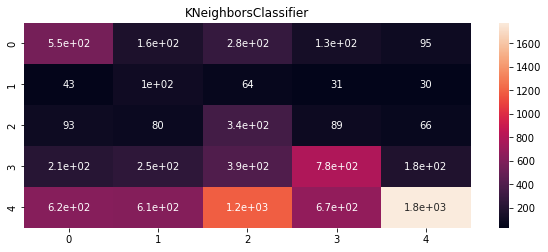

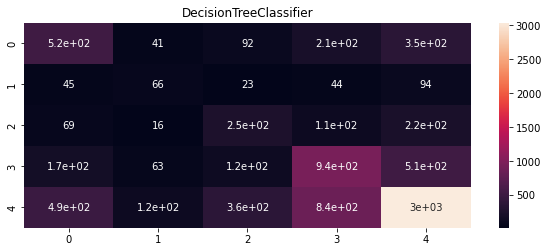

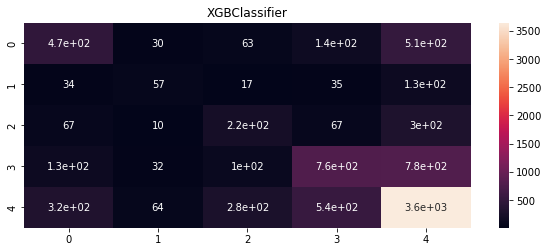

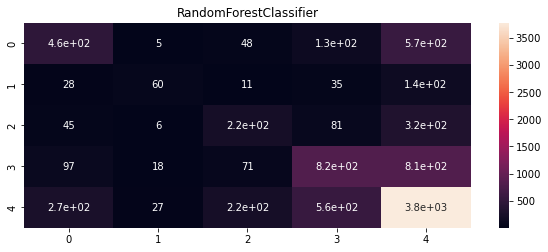

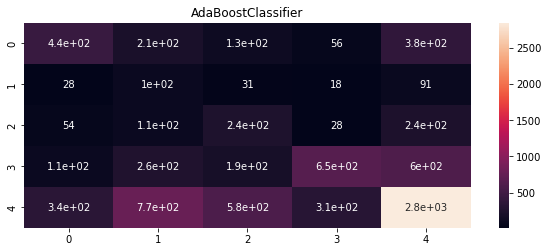

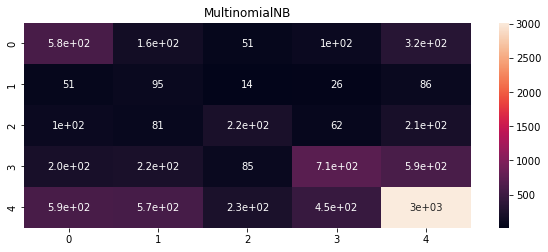

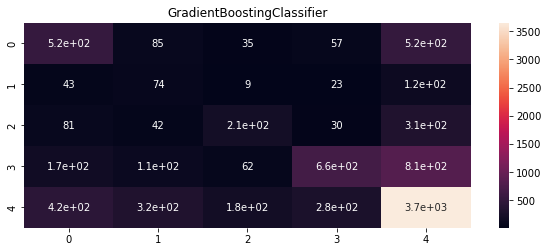

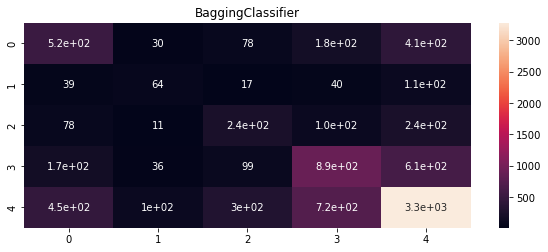

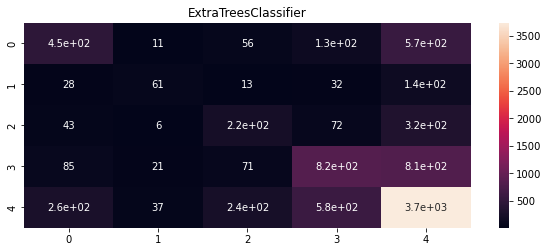

In [69]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
        
Model= []
score= []
cvs=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_SMOTE,y_train_SMOTE)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x_train_SMOTE, y_train_SMOTE, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [78]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,40.285812,67.724964
1,DecisionTreeClassifier,54.599070,69.351449
2,XGBClassifier,58.500624,70.190516
3,RandomForestClassifier,60.508109,78.592616
4,AdaBoostClassifier,48.621980,50.901121
5,MultinomialNB,52.364750,60.769368
6,GradientBoostingClassifier,57.990246,60.203660
7,BaggingClassifier,56.572530,73.185341
8,ExtraTreesClassifier,60.088465,79.370214


# Using gridsearch cv to find the best parameters in GradientBoostingClassifier

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [1, 3], 
            'min_samples_leaf': [1, 3], 
            'min_samples_split': [1, 3, 5],
            'n_estimators': [100,200]}
gbc=GradientBoostingClassifier()

gsv=GridSearchCV(gbc,parameters,cv=5,n_jobs=-1)
gsv.fit(x_train_SMOTE,y_train_SMOTE)
print(gsv.best_params_)

In [ ]:
#RandomForesetClassifier with best parameters

print('GradientBoostingClassifier')
rfc=GradientBoostingClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=1, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

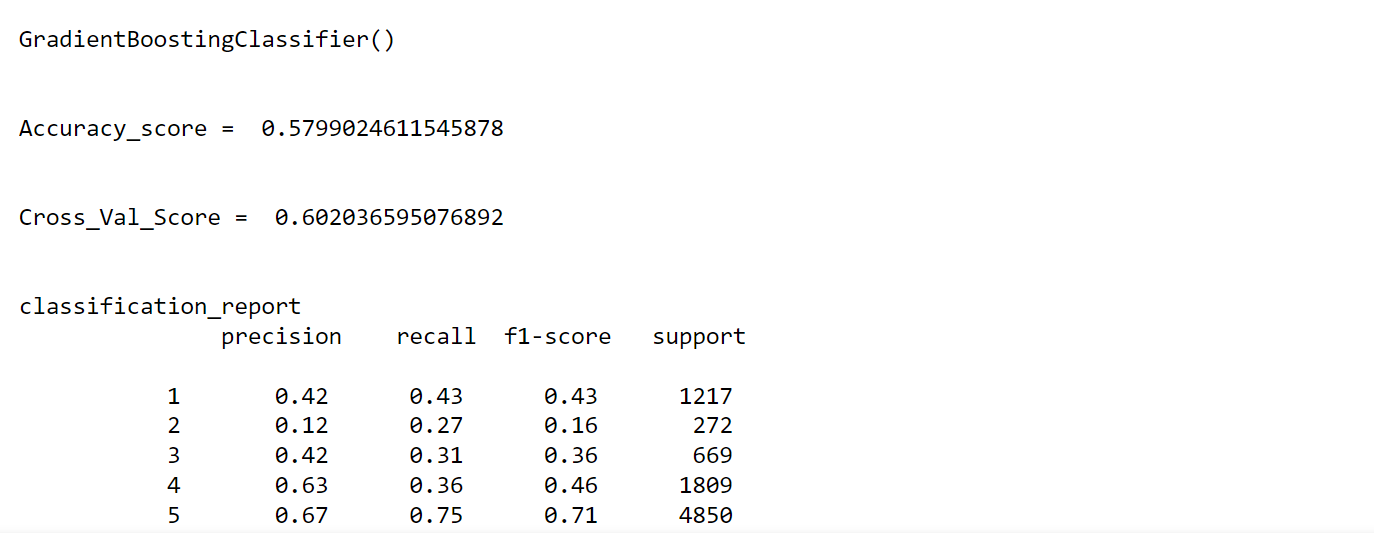

In [ ]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

In [ ]:
model=joblib.load('Ratings_prediction.csv')

In [ ]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)